<Axes: xlabel='PCA1', ylabel='PCA2'>

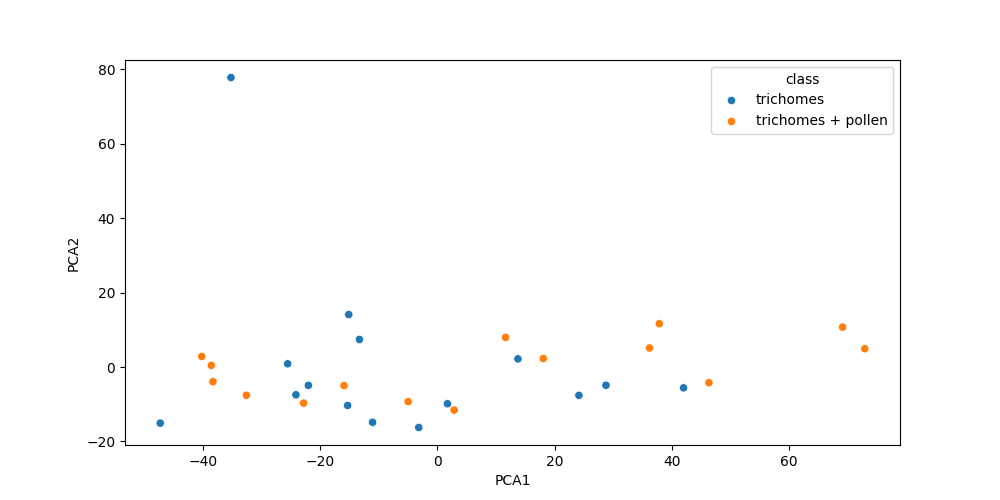

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib widget
trichomes_spectra = pd.read_csv("t_pe/protein_extract_spectra/protein_extract_32_scans.csv")
trichomes_pollen_spectra = pd.read_csv("t+p_pe/protein_extract_spectra/protein_extract_32_scans.csv")
wavenumber = pd.read_csv("wavenumber.csv",header=0)
trichomes_spectra = trichomes_spectra.T.reset_index(drop=True)
trichomes_pollen_spectra = trichomes_pollen_spectra.T.reset_index(drop=True)
trichomes_spectra.columns = wavenumber['wavenumber']
trichomes_pollen_spectra.columns = wavenumber['wavenumber']

trichomes_spectra['class'] = 'trichomes'
trichomes_pollen_spectra['class'] = 'trichomes + pollen'
main_df = pd.concat([trichomes_spectra, trichomes_pollen_spectra], axis=0, ignore_index=True)
main_df.columns.name = None
pca = PCA(n_components=2)
scaler = StandardScaler()
y = main_df.pop('class')
X = main_df
X = scaler.fit_transform(X)

import seaborn as sns
pca_result = pca.fit_transform(X)
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])

pca_plot, axis = plt.subplots(1,1, figsize=(10,5))

sns.scatterplot(x=pca_df['PCA1'], y=pca_df['PCA2'], hue=y.astype(str), palette='tab10', marker='o')

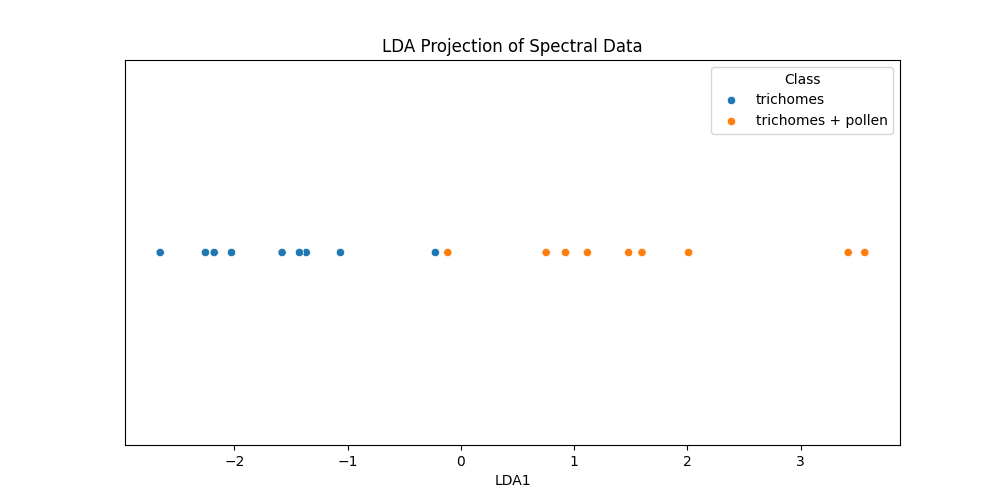

In [114]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

%matplotlib widget

# Load data
trichomes_spectra = pd.read_csv("mango_trichomes/compiled_spectral_data/mango_trichomes_32_scans.csv")
trichomes_pollen_spectra = pd.read_csv("trichomes_pollen/compiled_spectral_data/trichomes_pollen_scan32.csv")
wavenumber = pd.read_csv("trichomes_pollen/compiled_spectral_data/wavenumber.csv", header=0)

# Transpose and reset index
trichomes_spectra = trichomes_spectra.T.reset_index(drop=True)
trichomes_pollen_spectra = trichomes_pollen_spectra.T.reset_index(drop=True)

# Assign wavenumber column names
trichomes_spectra.columns = wavenumber['wavenumber']
trichomes_pollen_spectra.columns = wavenumber['wavenumber']

# Add class labels
trichomes_spectra['class'] = 'trichomes'
trichomes_pollen_spectra['class'] = 'trichomes + pollen'

# Combine datasets
main_df = pd.concat([trichomes_spectra, trichomes_pollen_spectra], axis=0, ignore_index=True)
main_df.columns.name = None  # Remove column index name

# Feature scaling
scaler = StandardScaler()
y = main_df.pop('class')  # Labels
X = scaler.fit_transform(main_df)  # Features

# Perform LDA
lda = LinearDiscriminantAnalysis(n_components=1)  # Max components = classes - 1 (so 1 for 2 classes)
lda_result = lda.fit_transform(X, y)

# Create DataFrame for LDA results
lda_df = pd.DataFrame(lda_result, columns=['LDA1'])
lda_df['class'] = y  # Add class labels for color coding

# Plot LDA results
plt.figure(figsize=(10, 5))
sns.scatterplot(x=lda_df['LDA1'], y=[0] * len(lda_df), hue=lda_df['class'], palette='tab10', marker='o')

plt.xlabel('LDA1')
plt.yticks([])  # Remove y-axis since we only have one LDA component
plt.title('LDA Projection of Spectral Data')
plt.legend(title='Class')
plt.show()
